In [1]:
import torch 
from sbi.analysis import pairplot

import matplotlib.pyplot as plt

from rbi.utils.datasets import get_datasets, get_reference_simulator
from rbi.utils.nets import MixtureDiagGaussianModel, MultivariateGaussianNet
from rbi.loss.loss_fn import NLLLoss

In [8]:
from rbibm.tasks.lv_task import LotkaVolterraTask

task = LotkaVolterraTask()
prior = task.get_prior()
simulator = task.get_simulator()

train_loader, _ , _ =task.get_train_test_val_dataset(1000, 1, 1)

In [2]:
t_max = 20
time_points_observed = 50

train_loader, test_loader = get_datasets("lotka_volterra_inverse", time_points_observed=time_points_observed, t_max=t_max, N_train=50000, N_test=20000, batch_size=10000)
ref_simulator = get_reference_simulator("lotka_volterra", time_points_observed = time_points_observed, t_max=t_max)

IndexError: too many indices for tensor of dimension 1

In [33]:
from rbi.defenses.regularized_pre_loss import IntervalBoundPropagation, L2PGDAdversarialTraining
from rbi.utils.interval import Interval, Symbolic_interval

from rbi.utils.nets import SplineAutoregressiveModel

In [41]:
net = SplineAutoregressiveModel(100, 4, hidden_dims=[100, 100], inverse_flow=True, num_transforms=2)
loss_fn = NLLLoss(net)
defense = L2PGDAdversarialTraining(net, loss_fn, eps=0.5, nb_iter=5)
defense.activate()

In [42]:
loss_fn(X,Y)

tensor([4.6293], grad_fn=<AddBackward0>)

In [43]:
optim = torch.optim.Adam(net.parameters(), lr=1e-3)

for i in range(200):
    for X,Y in train_loader:
        optim.zero_grad()
        loss = loss_fn(X,Y)
        loss.backward()
        optim.step()
    print(loss)

tensor([3.7891], grad_fn=<AddBackward0>)
tensor([2.8332], grad_fn=<AddBackward0>)
tensor([2.3168], grad_fn=<AddBackward0>)
tensor([1.8541], grad_fn=<AddBackward0>)
tensor([1.3060], grad_fn=<AddBackward0>)
tensor([1.3463], grad_fn=<AddBackward0>)
tensor([0.9543], grad_fn=<AddBackward0>)
tensor([0.5463], grad_fn=<AddBackward0>)
tensor([0.3658], grad_fn=<AddBackward0>)
tensor([0.3599], grad_fn=<AddBackward0>)
tensor([0.0897], grad_fn=<AddBackward0>)
tensor([-0.3699], grad_fn=<AddBackward0>)
tensor([-0.3678], grad_fn=<AddBackward0>)
tensor([-0.5675], grad_fn=<AddBackward0>)
tensor([-0.8445], grad_fn=<AddBackward0>)
tensor([-0.9784], grad_fn=<AddBackward0>)
tensor([-1.0127], grad_fn=<AddBackward0>)
tensor([-1.1755], grad_fn=<AddBackward0>)
tensor([-1.2543], grad_fn=<AddBackward0>)
tensor([-1.4801], grad_fn=<AddBackward0>)
tensor([-1.6479], grad_fn=<AddBackward0>)
tensor([-1.7963], grad_fn=<AddBackward0>)
tensor([-1.9441], grad_fn=<AddBackward0>)
tensor([-1.9173], grad_fn=<AddBackward0>)
ten

In [309]:
net2 = MixtureDiagGaussianModel(100, 4, num_components=4,hidden_dims=[100, 100])
loss_fn2 = NLLLoss(net2)

In [310]:
optim = torch.optim.Adam(net2.parameters(), lr=1e-3)

for i in range(200):
    for X,Y in train_loader:
        optim.zero_grad()
        loss = loss_fn2(X,Y)
        loss.backward()
        optim.step()
    print(loss)

tensor([5.0132], grad_fn=<AddBackward0>)
tensor([3.5311], grad_fn=<AddBackward0>)
tensor([2.6242], grad_fn=<AddBackward0>)
tensor([1.3795], grad_fn=<AddBackward0>)
tensor([0.4666], grad_fn=<AddBackward0>)
tensor([0.0200], grad_fn=<AddBackward0>)
tensor([-0.2527], grad_fn=<AddBackward0>)
tensor([-0.5428], grad_fn=<AddBackward0>)
tensor([-0.7924], grad_fn=<AddBackward0>)
tensor([-1.0014], grad_fn=<AddBackward0>)
tensor([-1.2419], grad_fn=<AddBackward0>)
tensor([-1.4389], grad_fn=<AddBackward0>)
tensor([-1.5451], grad_fn=<AddBackward0>)
tensor([-1.5634], grad_fn=<AddBackward0>)
tensor([-1.7032], grad_fn=<AddBackward0>)
tensor([-1.7469], grad_fn=<AddBackward0>)
tensor([-1.8292], grad_fn=<AddBackward0>)
tensor([-1.8784], grad_fn=<AddBackward0>)
tensor([-1.8443], grad_fn=<AddBackward0>)
tensor([-1.9029], grad_fn=<AddBackward0>)
tensor([-2.0390], grad_fn=<AddBackward0>)
tensor([-2.0976], grad_fn=<AddBackward0>)
tensor([-2.1755], grad_fn=<AddBackward0>)
tensor([-2.2376], grad_fn=<AddBackward0>

In [28]:
for X_test, y_test in train_loader:
    break

In [29]:
param = y_test[0].unsqueeze(0)
x_obs = X_test[0].unsqueeze(0).reshape(2, -1)

In [30]:
post_est = net(x_obs.reshape(1, -1))
post_est2 = net2(x_obs.reshape(1,-1))

NameError: name 'net2' is not defined

In [31]:
samples = post_est.sample((1000,)).squeeze()
samples2 = post_est2.sample((1000,)).squeeze()

NameError: name 'post_est2' is not defined

c:\users\manug\onedrive\uni\phd\sbi\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\users\manug\onedrive\uni\phd\sbi\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\users\manug\onedrive\uni\phd\sbi\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\users\manug\onedrive\uni\phd\sbi\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\users\manug\onedrive\uni\phd\sbi\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\users\manug\onedrive\uni\phd\sbi\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(


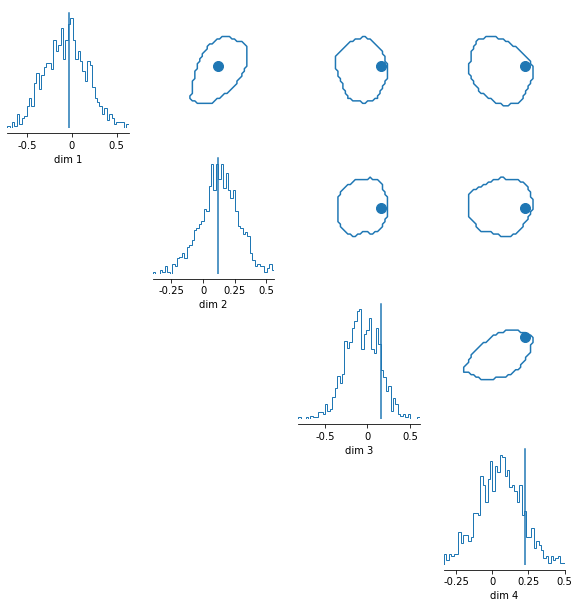

In [32]:
fig, _ = pairplot(samples, points=param, upper="contour", points_color="black")

c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(


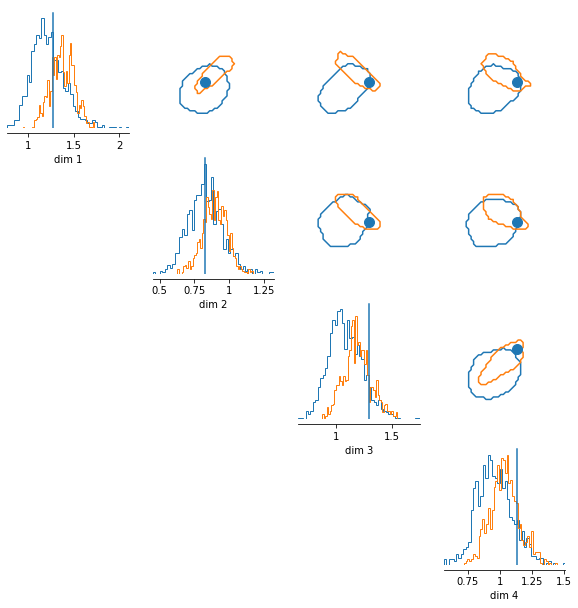

In [633]:
fig, _ = pairplot([samples, samples2], points=param, upper="contour", points_color="black")
fig.savefig("lv_robust_nonrobust_posterior.png")
fig.savefig("lv_robust_nonrobust_posterior.svg")

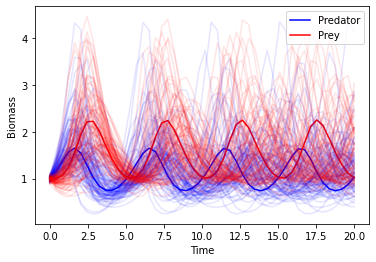

In [634]:
sols = ref_simulator(samples[:100], t_max ,time_points_observed)
plt.plot(torch.linspace(0,t_max, time_points_observed), x_obs[0].detach(), color="blue")
plt.plot(torch.linspace(0,t_max, time_points_observed), x_obs[1].detach(), color="red")
plt.plot(torch.linspace(0,t_max, time_points_observed),sols[:,:,0], color="blue", alpha=0.1)
_ = plt.plot(torch.linspace(0,t_max, time_points_observed),sols[:,:,1], color="red", alpha=0.1)



plt.xlabel("Time")
plt.ylabel("Biomass")
plt.legend(["Predator", "Prey"])
plt.savefig("lv_predictive_robust.png")
plt.savefig("lv_predictive_robust.svg")

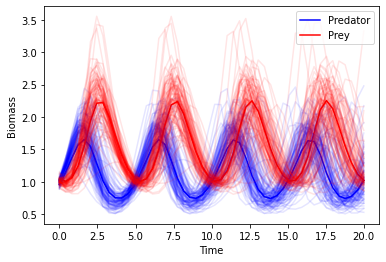

In [635]:
sols = ref_simulator(samples2[:100], t_max ,time_points_observed)
plt.plot(torch.linspace(0,t_max, time_points_observed), x_obs[0].detach(), color="blue")
plt.plot(torch.linspace(0,t_max, time_points_observed), x_obs[1].detach(), color="red")
plt.plot(torch.linspace(0,t_max, time_points_observed),sols[:,:,0], color="blue", alpha=0.1)
_ = plt.plot(torch.linspace(0,t_max, time_points_observed),sols[:,:,1], color="red", alpha=0.1)



plt.xlabel("Time")
plt.ylabel("Biomass")
plt.legend(["Predator", "Prey"])
plt.savefig("lv_predictive_nonrobust.png")
plt.savefig("lv_predictive_nonrobust.svg")

In [636]:
from rbi.attacks.advertorch_attack import LinfPGDAttack, LinfMomentumIterativeAttack, L2MomentumIterativeAttack
from rbi.attacks.custom_attacks import WhiteNoiseAttack
from rbi.metrics.empirical_metrics import EmpiricalAdversarialTestLossMetric
from rbi.metrics.empirical_metrics import EmpiricalApproximationfKL
from rbi.loss.loss_fn import LogLikelihoodLoss, ForwardKLLoss, NegativeLogLikelihoodLoss

from rbi.visualization.robustness_eval_plots import plot_metric_for_pertubation_scales

In [637]:
adversarial_loss = ForwardKLLoss()
test_loss = NegativeLogLikelihoodLoss()
adversarial_loss2 = LogLikelihoodLoss()

In [651]:
network = net

In [652]:
attack1 = LinfPGDAttack(network, loss_fn=adversarial_loss, eps=0.3, nb_iter=1000, eps_iter=0.1, targeted=False)
attack2 = WhiteNoiseAttack(network)


In [640]:
#attack1 = LinfMomentumIterativeAttack(net, loss_fn=adversarial_loss2, eps=0.2,eps_iter=0.1, nb_iter=500, targeted=True)

In [658]:
param = param
X = x_obs.reshape(1, -1).clone()
X_perturbed = attack1.perturb(X)

In [654]:
# for X, param in test_loader:
#     X = x_obs
#     #param = param[:1]
#     X_perturbed = attack1.perturb(X)
#     break

In [659]:
losses = torch.vstack([ForwardKLLoss(reduction=None, mc_samples=100)(network(X),network(X_perturbed)) for _ in range(20)]).mean(0)
sort_attacks = losses.argsort()


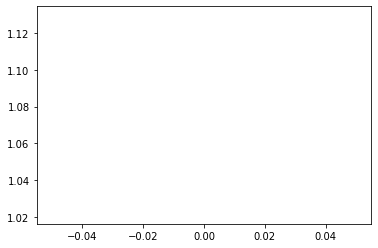

In [660]:
plt.plot(losses[sort_attacks].detach())

In [661]:
X_perturbed = X_perturbed[sort_attacks]
X = X[sort_attacks]
param = param[sort_attacks]

In [662]:
X_perturbed = X_perturbed.reshape(-1, time_points_observed, 2).detach()
X = X.reshape(-1, time_points_observed, 2).detach()

In [663]:
index = -1

In [664]:
t = torch.linspace(0,t_max, time_points_observed)

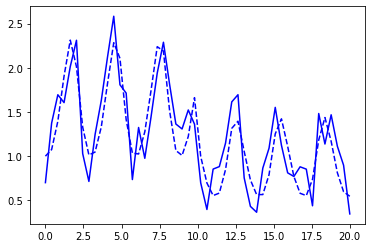

In [555]:
plt.plot(torch.linspace(0,t_max, time_points_observed), X_perturbed[index,:,0].detach(), color="blue")
#
plt.plot(torch.linspace(0,t_max, time_points_observed), X[index,:,0].detach(), color="blue", linestyle="--")
#

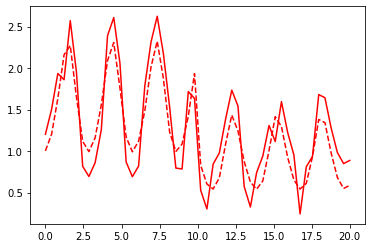

In [556]:
plt.plot(torch.linspace(0,t_max, time_points_observed), X_perturbed[index,:,1].detach(), color="red")
plt.plot(torch.linspace(0,t_max, time_points_observed), X[index,:,1].detach(), color="red", linestyle="--")

In [665]:
post_est1 = network(X[index].reshape(1,-1))
post_est2 = network(X_perturbed[index].reshape(1,-1))

c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(
c:\ProgramData\Miniconda3\lib\site-packages\sbi\analysis\plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(


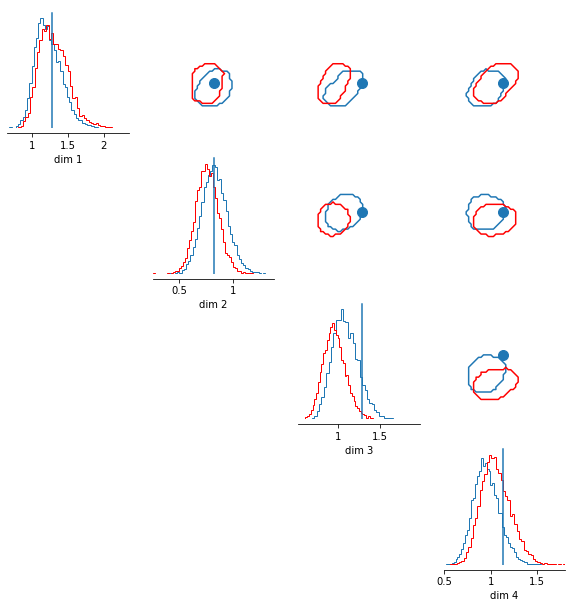

In [667]:
samples1 = post_est1.sample((10000,)).squeeze()
samples2 = post_est2.sample((10000,)).squeeze()

fig, _ = pairplot([samples1, samples2], upper="contour", points=param[index], samples_colors=["C0", "red"])
fig.savefig("lv_robust_adversarial_attack.png")
fig.savefig("lv_robust_adversarial_attack.svg")

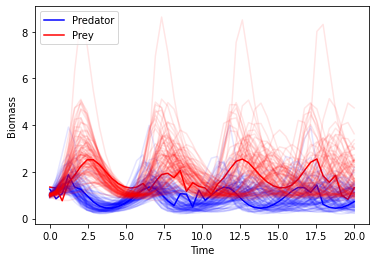

In [668]:
sols = ref_simulator(samples2[:100], t_max ,time_points_observed)
plt.plot(torch.linspace(0,t_max, time_points_observed), X_perturbed.reshape(2,50)[0].detach(), color="blue")
plt.plot(torch.linspace(0,t_max, time_points_observed), X_perturbed.reshape(2,50)[1].detach(), color="red")
plt.plot(torch.linspace(0,t_max, time_points_observed),sols[:,:,0], color="blue", alpha=0.1)
_ = plt.plot(torch.linspace(0,t_max, time_points_observed),sols[:,:,1], color="red", alpha=0.1)



plt.xlabel("Time")
plt.ylabel("Biomass")
plt.legend(["Predator", "Prey"])
plt.savefig("lv_adversarial_predictive_robust.png")
plt.savefig("lv_adversarial_predictive_robust.svg")

In [441]:
?pairplot

Signature:
pairplot(
    samples: Union[List[numpy.ndarray], List[torch.Tensor], numpy.ndarray, torch.Tensor],
    points: Union[List[numpy.ndarray], List[torch.Tensor], numpy.ndarray, torch.Tensor, NoneType] = None,
    limits: Union[List, torch.Tensor, NoneType] = None,
    subset: Optional[List[int]] = None,
    upper: Optional[str] = 'hist',
    diag: Optional[str] = 'hist',
    figsize: Tuple = (10, 10),
    labels: Optional[List[str]] = None,
    ticks: Union[List, torch.Tensor] = [],
    points_colors: List[str] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
    fig=None,
    axes=None,
    **kwargs,
)
Docstring:
Plot samples in a 2D grid showing marginals and pairwise marginals.

Each of the diagonal plots can be interpreted as a 1D-marginal of the distribution
that the samples were drawn from. Each upper-diagonal plot can be interpreted as a
2D-marginal of the distribution.

Args:
    samples: Samples used to b

In [236]:
F = compute_reparameterized_fisher(net, X[index].reshape(-1, 200)[-100:], net(X.reshape(-1, 200)[-100:]), mc_samples=500).detach()
F_pert = compute_reparameterized_fisher(net, X_perturbed[index].reshape(-1, 200)[-100:], net(X_perturbed.reshape(-1, 200)[-100:]), mc_samples=500).detach()

In [223]:
X_perturbed.shape

torch.Size([10000, 100, 2])

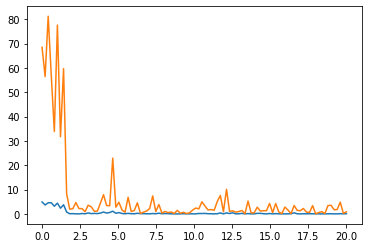

In [237]:
plt.plot(t,torch.diagonal(F, dim1=-2, dim2=-1).mean(0)[-100:])
plt.plot(t,torch.diagonal(F_pert, dim1=-2, dim2=-1).mean(0)[-100:])

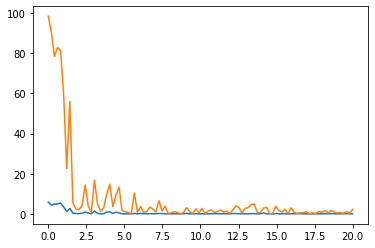

In [227]:
plt.plot(t,torch.diagonal(F, dim1=-2, dim2=-1).mean(0)[-100:])
plt.plot(t,torch.diagonal(F_pert, dim1=-2, dim2=-1).mean(0)[-100:])

In [228]:
from rbi.utils.fisher_info import compute_reparameterized_fisher

F = compute_reparameterized_fisher(net, X.reshape(-1, 200)[-100:], net(X.reshape(-1, 200)[-100:]), mc_samples=500).detach()
F_pert = compute_reparameterized_fisher(net, X_perturbed.reshape(-1, 200)[-100:], net(X_perturbed.reshape(-1, 200)[-100:]), mc_samples=500).detach()

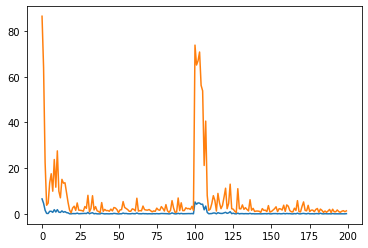

In [229]:
plt.plot(torch.diagonal(F, dim1=-2, dim2=-1).mean(0))
plt.plot(torch.diagonal(F_pert, dim1=-2, dim2=-1).mean(0))

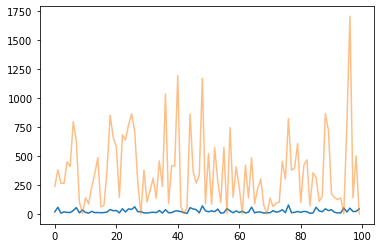

In [170]:
plt.plot(torch.linalg.eigvalsh(F).max(-1).values)
plt.plot(torch.linalg.eigvalsh(F_pert).max(-1).values, alpha=0.5)

In [418]:
m1 = EmpiricalAdversarialTestLossMetric(net, LinfPGDAttack(net, loss_fn=adversarial_loss, eps=0.2, nb_iter=5, eps_iter=0.01, targeted=False), test_loss)
m2 = EmpiricalAdversarialTestLossMetric(net, attack2, test_loss)
m3 = EmpiricalAdversarialTestLossMetric(net2, LinfPGDAttack(net2, loss_fn=adversarial_loss, eps=0.2, nb_iter=5, eps_iter=0.01, targeted=False), test_loss)
m4 = EmpiricalAdversarialTestLossMetric(net2, attack2, test_loss)

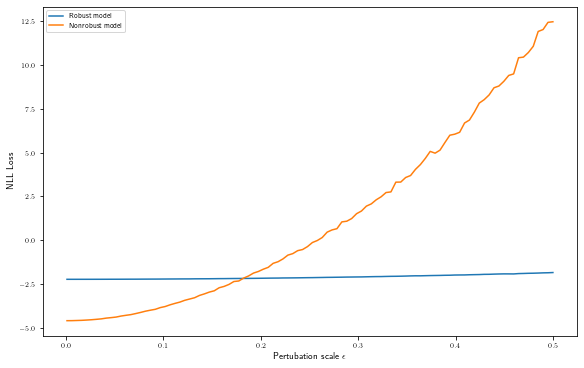

In [467]:
fig = plot_metric_for_pertubation_scales(torch.linspace(0.001, 0.5, 100), [m2, m4], test_loader, legend_names=["Robust model", "Nonrobust model"])
fig.savefig("lv_gaussian_perturbations.png")
fig.savefig("lv_gaussian_perturbations.svg")

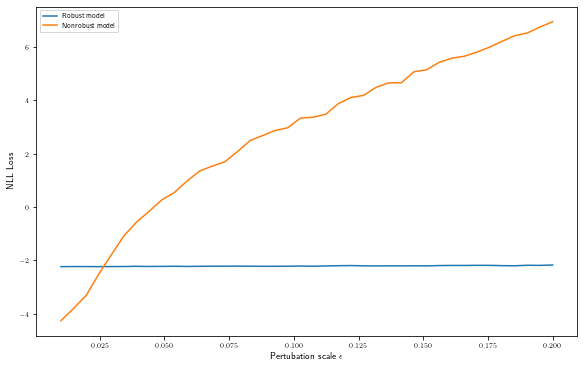

In [468]:
fig = plot_metric_for_pertubation_scales(torch.linspace(0.01, 0.2, 40), [m1, m3], test_loader, legend_names=["Robust model", "Nonrobust model"])
fig.savefig("lv_pgd.png")
fig.savefig("lv_pgd.svg")

In [249]:
attack1.eps=0.3
attack1.nb_iter=1000
attack1.eps_iter = 1e-2
x_perturbed = attack1.perturb(x_obs.reshape(1, -1))

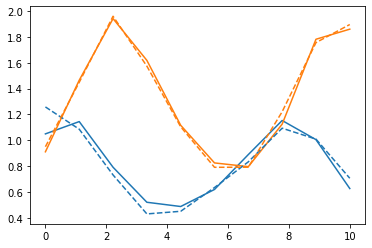

In [250]:
plt.plot(torch.linspace(0,10, 10),x_obs[:,:,0])
plt.plot(torch.linspace(0,10, 10),x_obs[:,:,1])

plt.plot(torch.linspace(0,10, 10),x_perturbed.reshape(x_obs.shape)[:,:,0], color="C0", linestyle="dashed")
plt.plot(torch.linspace(0,10, 10),x_perturbed.reshape(x_obs.shape)[:,:,1], color="C1", linestyle="dashed")

In [251]:
post_est = net(x_perturbed)

In [253]:
samples1 = post_est.sample((1,1000)).reshape(-1,4)[::2]

(<Figure size 720x720 with 16 Axes>,
 array([[<AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='dim 3'>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:xlabel='dim 4'>]], dtype=object))

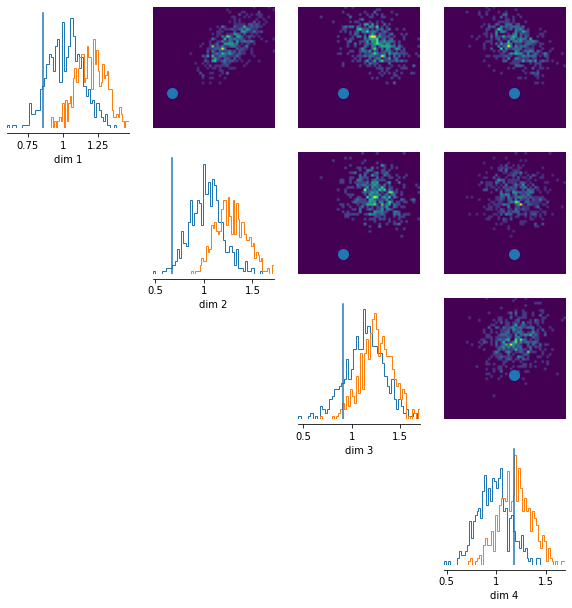

In [254]:
pairplot([samples, samples1], points=param)

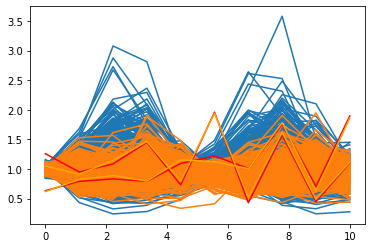

In [274]:
sols = ref_simulator(samples1, 10, 10)
plt.plot(torch.linspace(0,10, 10),sols[:,:,0], color="C0")
_ = plt.plot(torch.linspace(0,10, 10),sols[:,:,1], color="C1")
plt.plot(torch.linspace(0,10, 10), x_perturbed[0,:10].detach(), color="red")
plt.plot(torch.linspace(0,10, 10), x_perturbed[0,10:].detach(), color="red")

plt.plot(torch.linspace(0,10, 10), x_obs.reshape(-1,20)[0,:10].detach(), color="orange")
plt.plot(torch.linspace(0,10, 10), x_obs.reshape(-1,20)[0,10:].detach(), color="orange")